# Predicting Machine Component Lifespan Using Weibull Distribution

#### STEP 1: Problem Statement

"The reliability team wants to model time-to-failure of a critical machine component to estimate product lifespan, failure risk, and warranty planning."

#### STEP 2: 5W1H Analysis

| Element | Description |
|--------|-------------|
| **What** | Time until component fails (lifespan) |
| **Why** | Plan maintenance, warranty, inventory |
| **When** | Tracked over months of machine use |
| **Where** | Plant A – Heavy Press Unit |
| **Who** | Reliability engineers, QA, production managers |
| **How** | Fit Weibull Distribution (flexible for aging, wear-out, early failure patterns) |

#### STEP 3: When to Use Weibull Distribution

Time-to-failure (lifespan, durability).

More flexible than exponential:

Shape parameter β < 1 → early failures

β = 1 → constant rate (same as exponential)

β > 1 → wear-out (aging components)

#### STEP 4: Simulate Lifespan Data

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import weibull_min

np.random.seed(42)

# Simulate failure times (in hours), β=1.5 (wear-out), η=1000 (scale)
shape_beta = 1.5
scale_eta = 1000
failure_times = weibull_min.rvs(shape_beta, scale=scale_eta, size=200)

df = pd.DataFrame({'Lifespan_Hours': failure_times})
df.head()

,Lifespan_Hours
0,603.875415
1,2084.759735
2,1201.345533
3,941.085251
4,306.426523


#### STEP 5: EDA & Visualization

       Lifespan_Hours
count      200.000000
mean       868.703225
std        590.125524
min         31.299567
25%        406.867734
50%        774.936667
75%       1259.883139
max       2658.290141


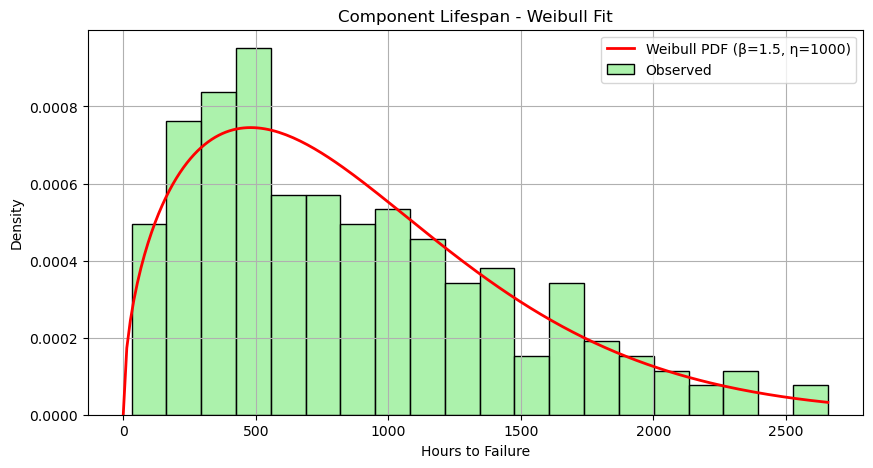

In [13]:
print(df.describe())

# Histogram + Weibull PDF
plt.figure(figsize=(10,5))
sns.histplot(df['Lifespan_Hours'], bins=20, kde=False, stat="density", color='lightgreen', label='Observed')

x = np.linspace(0, df['Lifespan_Hours'].max(), 200)
pdf_vals = weibull_min.pdf(x, shape_beta, scale=scale_eta)
plt.plot(x, pdf_vals, 'r-', lw=2, label=f'Weibull PDF (β={shape_beta}, η={scale_eta})')

plt.title('Component Lifespan - Weibull Fit')
plt.xlabel('Hours to Failure')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


#### STEP 6: Risk Estimation

Q: "What’s the probability a component fails before 800 hours?"

In [16]:
p_fail_early = weibull_min.cdf(800, shape_beta, scale=scale_eta)
print(f"Probability of failure before 800 hours: {p_fail_early:.2%}")


Probability of failure before 800 hours: 51.11%


##### Q: "What’s the probability it survives past 1200 hours?"

In [19]:
p_survive = 1 - weibull_min.cdf(1200, shape_beta, scale=scale_eta)
print(f"Probability of survival beyond 1200 hours: {p_survive:.2%}")


Probability of survival beyond 1200 hours: 26.86%


#### STEP 7: Interpretation
The model shows increasing failure rate over time (β = 1.5).

~51.11%% of units will fail before 800 hours.

~26.86% of units survive beyond 1200 hours.

#### STEP 8: Business Actions
Set preventive maintenance at 800 hours for 78% coverage.

Stock spare parts to meet expected failure curve.

Build warranty cutoff based on 90th percentile lifespan.
